# Investigate data gaps in Barrow scattering after extract from 20/3/2019

Reason: Compared to the previous extract from January, it appears that the Barrow data now has more gaps when evaluating the flag columns.

In [1]:
import pyaerocom as pya

Initating pyaerocom configuration
Checking server configuration ...
Checking access to: /lustre/storeA
Access to lustre database: True
Init data paths for lustre
Expired time: 0.016 s


In [2]:
r = pya.io.ReadEbas()
r.opts

ReadEbasOptions([('prefer_statistics', ['arithmetic mean', 'median']),
                 ('ignore_statistics',
                  ['percentile:15.87', 'percentile:84.13']),
                 ('wavelength_tol_nm', 50),
                 ('remove_invalid_flags', True),
                 ('remove_outliers', False),
                 ('keep_aux_vars', False),
                 ('log_read_stats', False),
                 ('merge_meta', False),
                 ('datalevel', None)])

## Load scattering, dry scattering and RH for Barrow (ignoring flag columns)

In [3]:
r.opts.remove_invalid_flags = False
r.opts.keep_aux_vars = True

In [4]:
data =  r.read('scatc550dryaer', station_names='Barrow')
data

Reading file 1 of 28 (ReadEbas)
Reading file 3 of 28 (ReadEbas)
Reading file 5 of 28 (ReadEbas)
Reading file 7 of 28 (ReadEbas)
Reading file 9 of 28 (ReadEbas)
Reading file 11 of 28 (ReadEbas)
Reading file 13 of 28 (ReadEbas)
Reading file 15 of 28 (ReadEbas)
Reading file 17 of 28 (ReadEbas)
Reading file 19 of 28 (ReadEbas)
Reading file 21 of 28 (ReadEbas)
Reading file 23 of 28 (ReadEbas)
Reading file 25 of 28 (ReadEbas)
Reading file 27 of 28 (ReadEbas)


UngriddedData <networks: ['EBASMC']; vars: ['scatc550aer', 'scatc550dryaer', 'scatcrh']; instruments: ['MRI_1559B_BRW', 'MRI_1559B_BRW_pm10', 'MRI_4-W_BRW', 'TSI_3563_BRW_pm10'];No. of stations: 28

In [5]:
rh = data.to_station_data('Barrow', 'scatcrh', insert_nans=True)
sc = data.to_station_data('Barrow', 'scatc550aer', insert_nans=True)
scdry = data.to_station_data('Barrow', 'scatc550dryaer', insert_nans=True)

### Plot time series of RH and scattering coeffs 

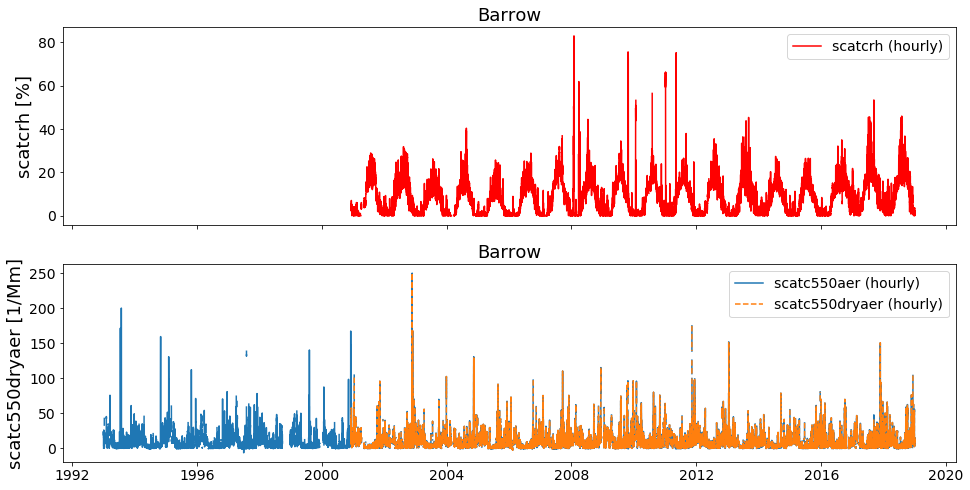

In [6]:
import matplotlib.pyplot as plt
fig, (ax0, ax1) = plt.subplots(2, 1, sharex=True, figsize=(16,8))
rh.plot_timeseries('scatcrh', add_overlaps=True, c='r', ax=ax0)
sc.plot_timeseries('scatc550aer', add_overlaps=True, ax=ax1)
scdry.plot_timeseries('scatc550dryaer', ls='--',  add_overlaps=True, ax=ax1);

## Load scattering, dry scattering and RH for Barrow (evaluate flag columns)

In [7]:
r.opts.remove_invalid_flags = True

In [8]:
data1 =  r.read('scatc550dryaer', station_names='Barrow')
data1

Reading file 1 of 28 (ReadEbas)
Reading file 3 of 28 (ReadEbas)
Reading file 5 of 28 (ReadEbas)
Reading file 7 of 28 (ReadEbas)
Reading file 9 of 28 (ReadEbas)
Reading file 11 of 28 (ReadEbas)
Reading file 13 of 28 (ReadEbas)
Reading file 15 of 28 (ReadEbas)
Reading file 17 of 28 (ReadEbas)
Reading file 19 of 28 (ReadEbas)
Reading file 21 of 28 (ReadEbas)
Reading file 23 of 28 (ReadEbas)
Reading file 25 of 28 (ReadEbas)
Reading file 27 of 28 (ReadEbas)


UngriddedData <networks: ['EBASMC']; vars: ['scatc550aer', 'scatc550dryaer', 'scatcrh']; instruments: ['MRI_1559B_BRW', 'MRI_1559B_BRW_pm10', 'MRI_4-W_BRW', 'TSI_3563_BRW_pm10'];No. of stations: 28

In [9]:
rh = data1.to_station_data('Barrow', 'scatcrh', insert_nans=True)
sc = data1.to_station_data('Barrow', 'scatc550aer', insert_nans=True)
scdry = data1.to_station_data('Barrow', 'scatc550dryaer', insert_nans=True)

### Plot time series of RH and scattering coeffs (flags evaluated and invalid removed)

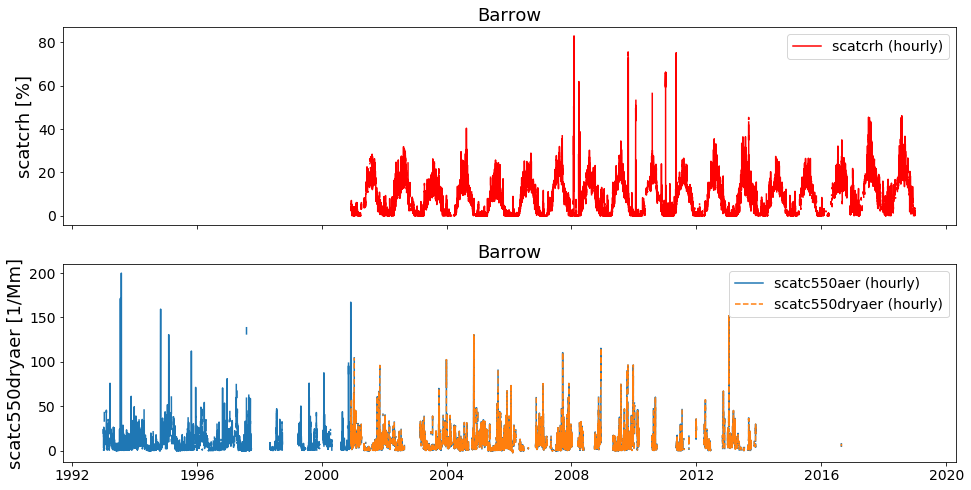

In [10]:
import matplotlib.pyplot as plt
fig, (ax0, ax1) = plt.subplots(2, 1, sharex=True, figsize=(16,8))
rh.plot_timeseries('scatcrh', add_overlaps=True, c='r', ax=ax0)
sc.plot_timeseries('scatc550aer', add_overlaps=True, ax=ax1)
scdry.plot_timeseries('scatc550dryaer', ls='--',  add_overlaps=True, ax=ax1);

## Load subsets for year 2018 

2018 is missing data when evaluating the flags compared to ignoring the flags. Investigate further.

In [11]:
r.opts.keep_aux_vars = True
r.opts.remove_invalid_flags = True

# data at invalid flags is set to NaN
subset =  r.read('scatc550dryaer', station_names='Barrow',
                  start_date='2018-01-01', stop_date='2018-12-31')

# data at invalid flags is kept as is
r.opts.remove_invalid_flags = False
subset_all =  r.read('scatc550dryaer', station_names='Barrow',
                       start_date='2018-01-01', stop_date='2018-12-31')

Reading file 1 of 1 (ReadEbas)
Reading file 1 of 1 (ReadEbas)


### Plot subset where flags columns are ignored

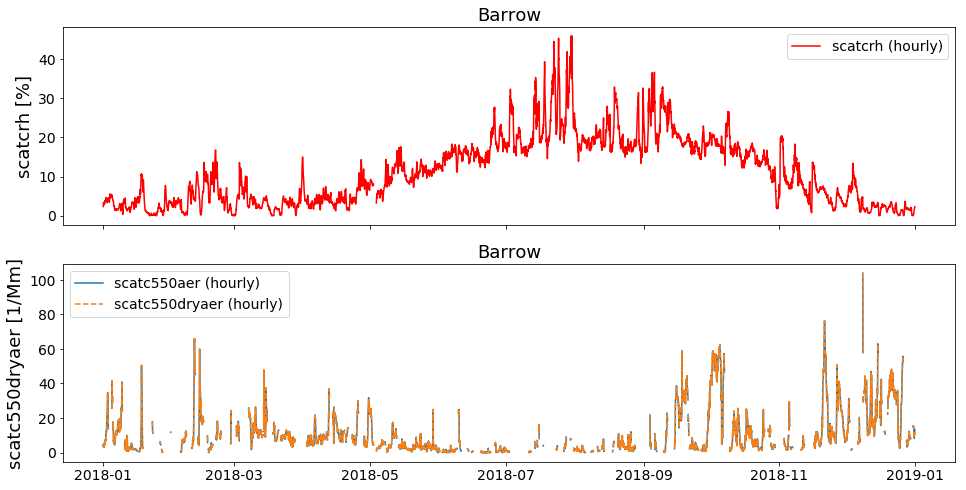

In [12]:
fig, (ax0, ax1) = plt.subplots(2, 1, sharex=True, figsize=(16,8))

subset_all.to_station_data('Barrow', 'scatcrh', insert_nans=True).plot_timeseries('scatcrh', add_overlaps=True, c='r', ax=ax0)
subset_all.to_station_data('Barrow', 'scatc550aer', insert_nans=True).plot_timeseries('scatc550aer', add_overlaps=True, ax=ax1)
subset_all.to_station_data('Barrow', 'scatc550dryaer', insert_nans=True).plot_timeseries('scatc550dryaer', ls='--',  add_overlaps=True, ax=ax1);

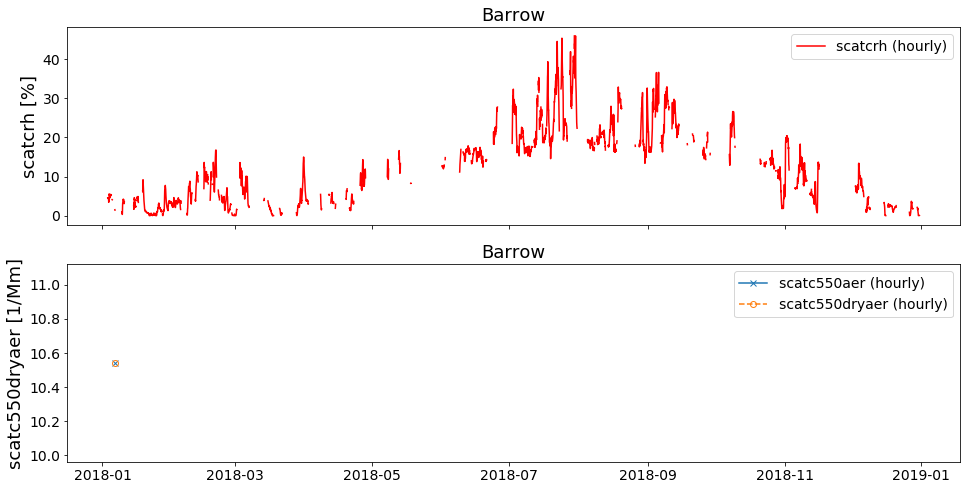

In [13]:
fig, (ax0, ax1) = plt.subplots(2, 1, sharex=True, figsize=(16,8))

subset.to_station_data('Barrow', 'scatcrh', insert_nans=True).plot_timeseries('scatcrh', add_overlaps=True, c='r', ax=ax0)
subset.to_station_data('Barrow', 'scatc550aer', insert_nans=True).plot_timeseries('scatc550aer', add_overlaps=True, marker='x', ax=ax1)
subset.to_station_data('Barrow', 'scatc550dryaer', insert_nans=True).plot_timeseries('scatc550dryaer', ls='--', marker='o', mfc='none', add_overlaps=True, ax=ax1);

In [14]:
r.files

['/lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/EBASMultiColumn/data/data/US0008R.20180101000000.20190313091242.nephelometer..pm10.1y.1h.US06L_TSI_3563_BRW_pm10.US06L_scat_coef.lev2.nas']

## Check 2018 data file

In [15]:
f2018 = r.files[0]
f2018

'/lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/EBASMultiColumn/data/data/US0008R.20180101000000.20190313091242.nephelometer..pm10.1y.1h.US06L_TSI_3563_BRW_pm10.US06L_scat_coef.lev2.nas'

### Read EBAS NASA Ames file used in previous section (2018, scattering, Barrow)

In [16]:
fdata = pya.io.EbasNasaAmesFile(f2018)
print(fdata)

Pyaerocom EbasNasaAmesFile
--------------------------

   num_head_lines: 93
   num_head_fmt: 1001
   data_originator: Sheridan, Patrick
   sponsor_organisation: US06L, National Oceanic and Atmospheric Administration, NOAA/ESRL/GMD, "Earth System Research Laboratory, Global Monitoring Division", 325 Broadway, , CO 80305-3, Boulder, U.S.A.
   submitter: Sheridan, Patrick
   project_association: GAW-WDCA NOAA-ESRL
   vol_num: 1
   vol_totnum: 1
   ref_date: 2018-01-01T00:00:00
   revision_date: 2019-03-13T00:00:00
   freq: 0.041667
   descr_time_unit: days from file reference point
   num_cols_dependent: 23
   mul_factors (list, 23 items)
   [1.0
    1.0
    ...
    1.0
    1.0]

   vals_invalid (list, 23 items)
   [999.999999
    99999.99
    ...
    999.99
    9.999999999999998]

   descr_first_col: end_time of measurement, days from the file reference point

   Column variable definitions
   -------------------------------
   EbasColDef: name=starttime, unit=days, is_var=False, is_fla

#### Check column names

In [17]:
fdata.col_names

['starttime',
 'endtime',
 'pressure',
 'relative_humidity',
 'temperature',
 'aerosol_light_backscattering_coefficient',
 'aerosol_light_backscattering_coefficient',
 'aerosol_light_backscattering_coefficient',
 'aerosol_light_backscattering_coefficient',
 'aerosol_light_backscattering_coefficient',
 'aerosol_light_backscattering_coefficient',
 'aerosol_light_backscattering_coefficient',
 'aerosol_light_backscattering_coefficient',
 'aerosol_light_backscattering_coefficient',
 'aerosol_light_scattering_coefficient',
 'aerosol_light_scattering_coefficient',
 'aerosol_light_scattering_coefficient',
 'aerosol_light_scattering_coefficient',
 'aerosol_light_scattering_coefficient',
 'aerosol_light_scattering_coefficient',
 'aerosol_light_scattering_coefficient',
 'aerosol_light_scattering_coefficient',
 'aerosol_light_scattering_coefficient',
 'numflag']

Only one flag column at the end that is used for all data columns.

### Extract raw timeseries of scattering at 550nm (no flags evaluated)

In [18]:
df = fdata.to_dataframe('aerosol_light_scattering_coefficient', wavelength_nm=550, statistics='arithmetic mean')
df

,aerosol_light_scattering_coefficient_1/Mm_550.0nm_arithmetic mean
2018-01-01 00:30:00,4.47
2018-01-01 01:29:59,3.93
2018-01-01 02:29:59,3.42
2018-01-01 03:30:00,3.54
2018-01-01 04:29:59,3.88
2018-01-01 05:29:59,3.60
2018-01-01 06:30:00,3.87
2018-01-01 07:29:59,3.30
2018-01-01 08:29:59,2.93
2018-01-01 09:30:00,3.87


### Get flag column information

In [19]:
flags = fdata.flag_col_info[23]

In [20]:
flags.decoded # 3D numpy array (rows is no. of measurements, column is 3 flags per measurement, 0 flag means valid)

array([[456,   0,   0],
       [456,   0,   0],
       [456,   0,   0],
       ...,
       [456,   0,   0],
       [456,   0,   0],
       [456,   0,   0]])

#### All flags that occur in file and their meaning

In [21]:
import numpy as np
all_flags_in_file = np.unique(flags.decoded)
all_flags_in_file

array([  0, 390, 392, 394, 456, 999])

In [22]:
for flag in all_flags_in_file:
    if flag != 0:
        print('{}: {}, {}'.format(flag, flags.FLAG_INFO['vals'][flag], flags.FLAG_INFO['info'][flag]))

390: V, Data completeness less than 50%
392: V, Data completeness less than 75%
394: V, Data completeness less than 90%
456: I, Invalidated by data originator
999: M, Missing measurement, unspecified reason


### Plot timeseries of scattering with and without flags evaluated

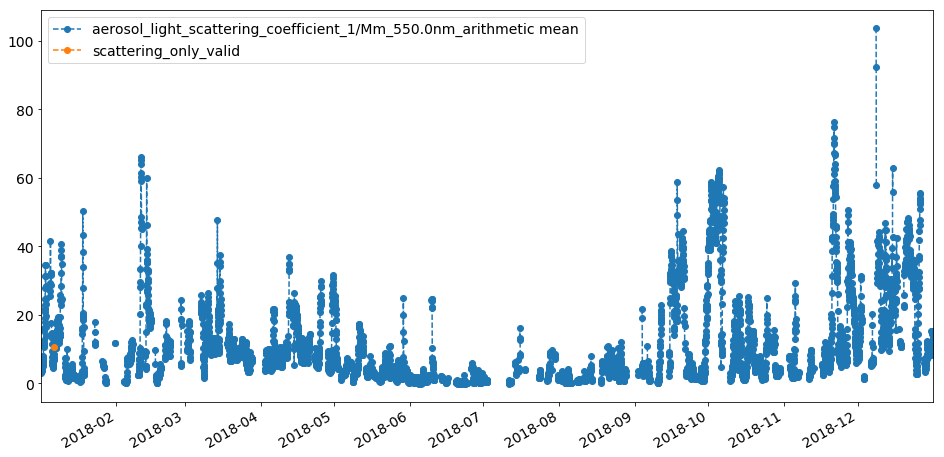

In [23]:
df['scattering_only_valid'] = df[flags.valid]
ax = df.plot(figsize=(16, 8), style='--o')

Most of the data is flagged invalid.